# Superstore Sales Data Analysis

## Business Understanding

#### This project centers on delving into historical sales data and identifying factors influencing store sales. By tackling key business questions related to product category, discount, store locations, and economic factors, the aim is to deliver actionable recommendations for inventory management, marketing strategies, and overall business optimization thereby contributing to the company's campaign; **'Operation  Increase Sales and Profit' (OISP)** which focuses on increasing the sales of the company and maximising profit.

### Null Hypothesis: The average sales of products with a discount are equal to the average sales of products without a discount. 
### Alternative Hypothesis: The average sales of products with a discount are greater than the average sales of products without a discount.

Key Business Questions
1. What is the sales and profit per market?
2. What is the most and least profitable market?
3. How are you going to increase the sales for the products that least bought?
4. Which month does the company records more sales?
5. What is the correlation between discount and sale?
6. Does the shipping cost affect the sales?
7. What is the dominant product category in each market?
8. City with most orders for a given product category?
9. which products are making loss?
10. Which segment provides more profit?
11. what is the correlation between quantity and profit?
12. what it the correlation between shipping cost and profit?
13. Which order priority yields more sales?
14. What is the average shipping cost to each region?
15. What product categories should be targetted to the  different markets?
16. Does the interval between the order date and the shipping date affect sale and profit

### Importations

In [2]:
##Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)


## Data Understanding

Data Overview and Sanity Checks

In [3]:
# Load the data set
df = pd.read_csv('superstore.csv', encoding='latin1')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,United States,94533.0,US,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,Morocco,NaN,Africa,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,NaN,LATAM,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,Mexico,NaN,LATAM,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


In [4]:
# preview first 5 rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [5]:
# preview last 5 rows
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,United States,94533.0,US,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,Morocco,NaN,Africa,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,NaN,LATAM,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,Mexico,NaN,LATAM,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium
51289,36388,CA-2014-156720,31-12-2014,4/1/2015,Standard Class,JM-15580,Jill Matthias,Consumer,Loveland,Colorado,United States,80538.0,US,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.17,Medium


In [6]:
# get shape of data
df.shape

(51290, 24)

In [7]:
# get datatypes
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

In [8]:
# get data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [9]:
# check for null values in dataset
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [10]:
# check for duplicates
df.duplicated().sum()

0

In [11]:
# get summary statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,51290.0,25645.500000,14806.291990,1.000,12823.250000,25645.500,38467.7500,51290.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.000000,56430.500,90008.0000,99301.000
Sales,51290.0,246.490581,487.565361,0.444,30.758625,85.053,251.0532,22638.480
Quantity,51290.0,3.476545,2.278766,1.000,2.000000,3.000,5.0000,14.000
Discount,51290.0,0.142908,0.212280,0.000,0.000000,0.000,0.2000,0.850
Profit,51290.0,28.610982,174.340972,-6599.978,0.000000,9.240,36.8100,8399.976
Shipping Cost,51290.0,26.375915,57.296804,0.000,2.610000,7.790,24.4500,933.570


In [12]:
# get summary statistics for categorical columns
df.describe(include='object')

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,25035,1430,1464,4,1590,795,3,3636,1094,147,7,13,10292,3,17,3788,4
top,CA-2014-100111,18-06-2014,22-11-2014,Standard Class,PO-18850,Muhammed Yedwab,Consumer,New York City,California,United States,APAC,Central,OFF-AR-10003651,Office Supplies,Binders,Staples,Medium
freq,14,135,130,30775,97,108,26518,915,2001,9994,11002,11117,35,31273,6152,227,29433


#### Handling constraints

In [14]:
# handling data type constaints
# the date columns must be changed from object to a datetime datatype
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='mixed')
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed')

# change postal code from float to object
df['Postal Code'] = df['Postal Code'].astype('str')

In [15]:
# confirm changes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     51290 non-null  object        
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

## Exploratory Data Analysis

#### Univariate Analysis of Columns

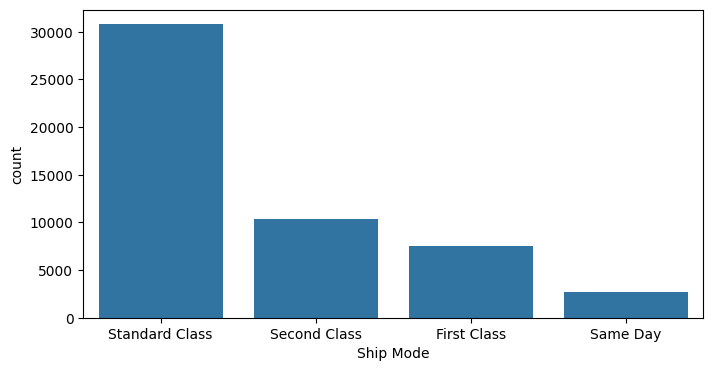

In [16]:
# univariate analysis for ship mode
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Ship Mode')
plt.show()

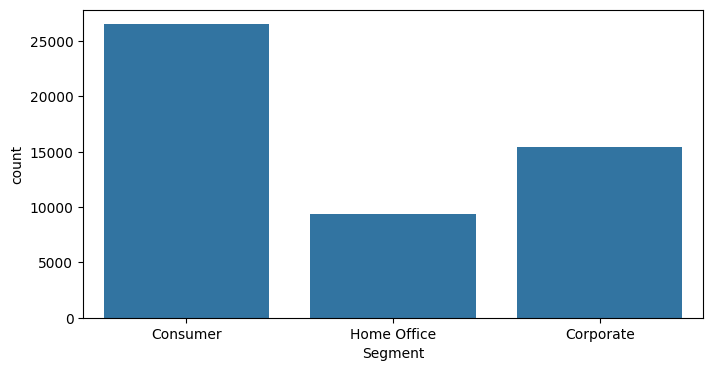

In [17]:
# univariate analysis for segment
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Segment')
plt.show()

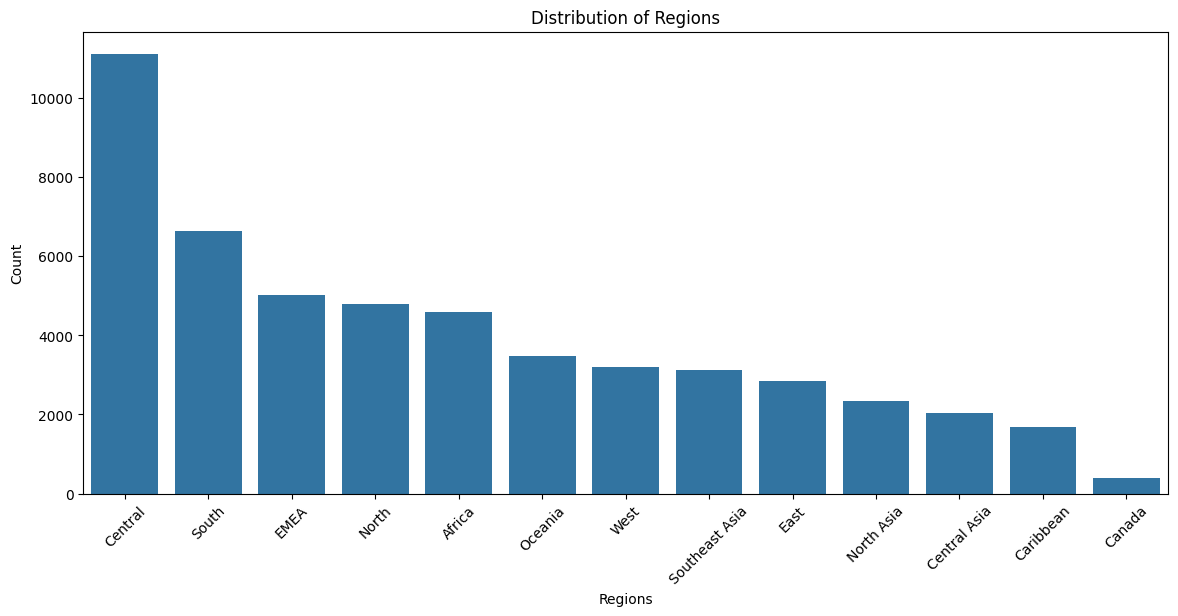

In [18]:
# Univariate analysis for Region
# get value counts for region column
regions = df['Region'].value_counts()
# create a barplot
plt.figure(figsize=(14,6))
sns.barplot(x=regions.index, y= regions.values)
plt.xlabel('Regions')
plt.ylabel('Count')
plt.title('Distribution of Regions')
plt.xticks(rotation=45)
plt.show()

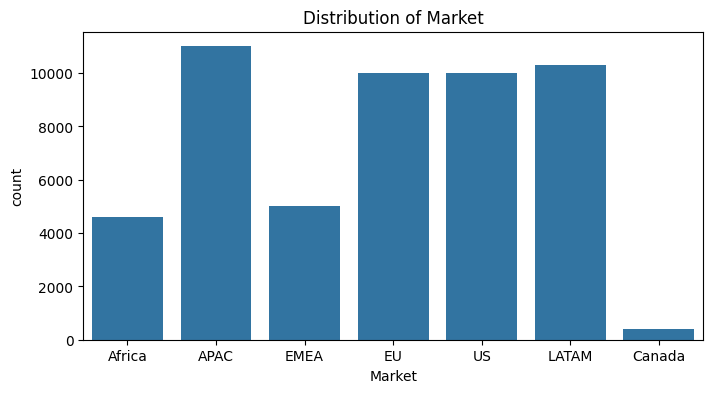

In [19]:
# univariate analysis for Market
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Market')
plt.title('Distribution of Market')
plt.show()

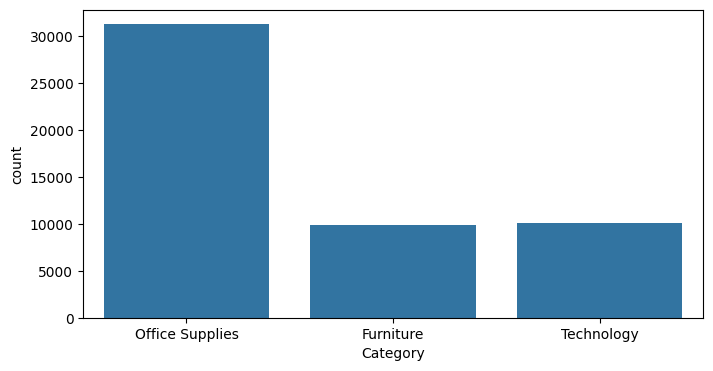

In [20]:
# univariate analysis for Category
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Category')
plt.show()

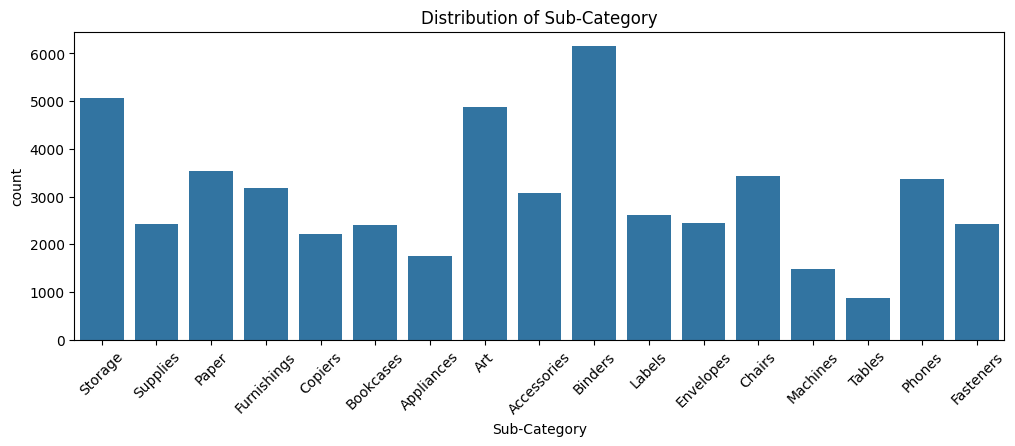

In [21]:
# univariate analysis for Sub-Category
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='Sub-Category')
plt.xticks(rotation=45)
plt.title('Distribution of Sub-Category')
plt.show()

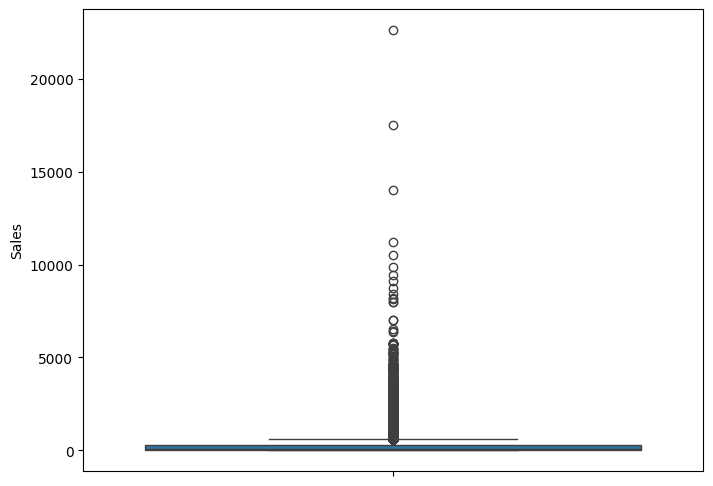

In [22]:
# univariate analysis for Sales
plt.figure(figsize=(8,6))
sns.boxplot(data=df, y='Sales')
plt.show()


The boxplot for Sales reveals the presence of outliers, indicating instances of exceptionally high sales values. These outliers suggest potential exceptional sales transactions that need further investigation to understand underlying factors. 

#### Bivariate Analysis

Bivariate analysis for Sales and Order Date

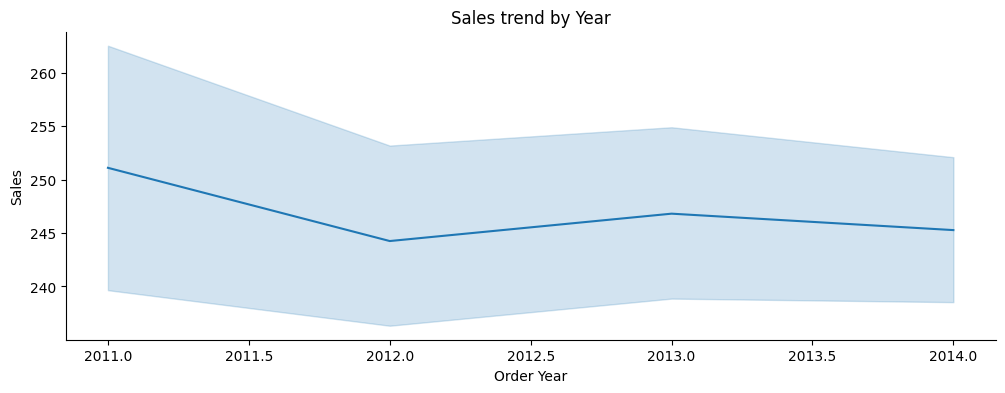

In [23]:
# Bivariate analysis for sales vs Order date
# Extract year from Date column
# Extract year
df['Order Year'] = df['Order Date'].dt.year
plt.figure(figsize=(12,4))
sns.lineplot(data=df, x='Order Year', y='Sales')
plt.title('Sales trend by Year')
# Remove shadows around the plots
sns.despine()
plt.show()


#### The line plot indicates a declining trend in sales over the years. This insight suggests a potential decrease in customer demand or other factors affecting sales performance, which may require further analysis

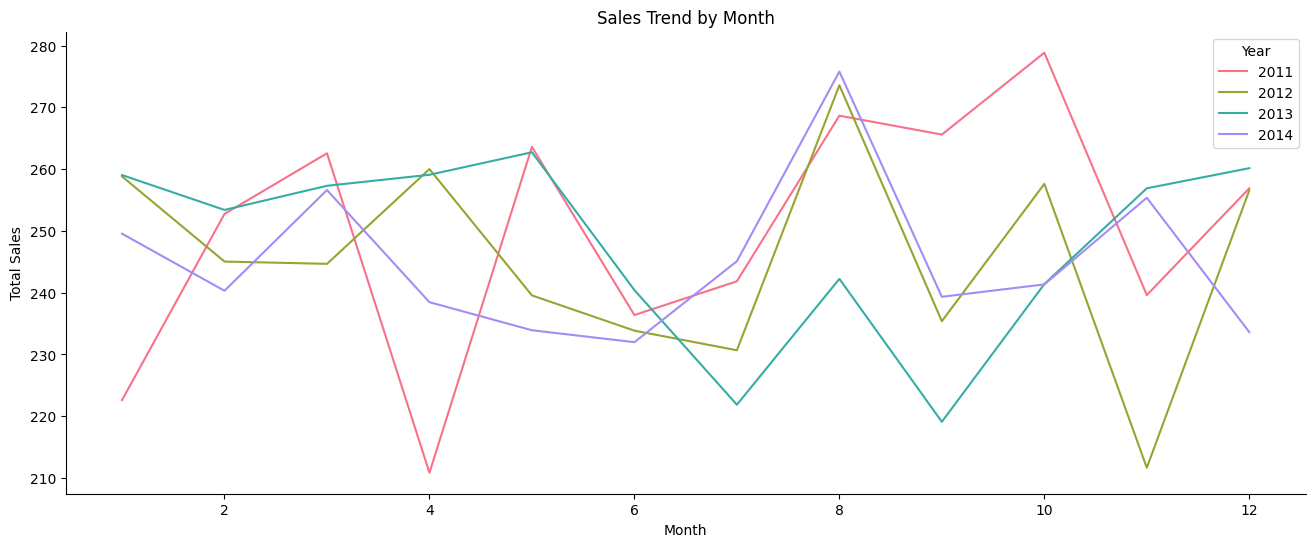

In [24]:
# Extract month from date
df['Order Month'] = df['Order Date'].dt.month
# Define contrasting colors for each year
palette = sns.color_palette("husl", n_colors=len(df['Order Year'].unique()))
# Create a line plot with different colors for each year
plt.figure(figsize=(16, 6))
sales_trend_by_month = sns.lineplot(x='Order Month', y='Sales', hue='Order Year', data=df, palette=palette, ci=None)
sales_trend_by_month.set_title('Sales Trend by Month')
sales_trend_by_month.set(xlabel='Month', ylabel='Total Sales')
# Remove shadows around the plots
sns.despine()
# Show the plot
plt.legend(title='Year')
plt.show()


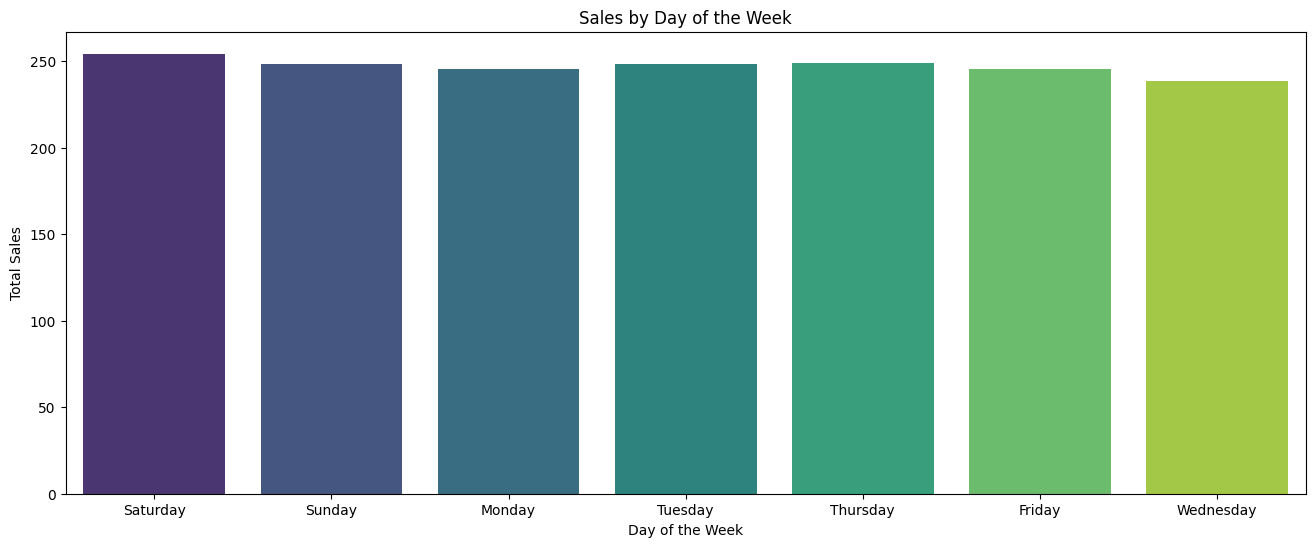

In [25]:
# Extract day of the week
df['day_of_week'] = df['Order Date'].dt.day_name()
# Create a bar plot for sales by day of the week
plt.figure(figsize=(16, 6))
sales_by_day = sns.barplot(x='day_of_week', y='Sales', data=df, ci=None, palette="viridis")
sales_by_day.set_title('Sales by Day of the Week')
sales_by_day.set(xlabel='Day of the Week', ylabel='Total Sales')

# Show the plot
plt.show()


#### The bar plot illustrates relatively consistent sales across different days of the week, suggesting minimal variation in sales volume on different days. This insight implies that sales performance remains stable throughout the week, without significant peaks or troughs observed across weekdays and weekends.

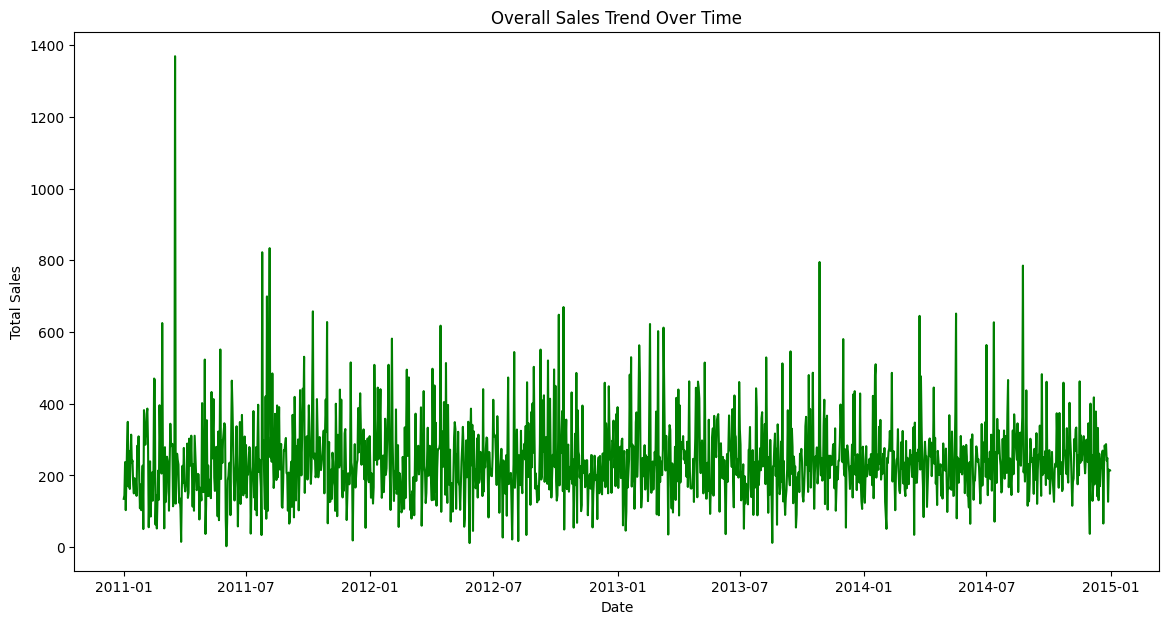

In [26]:

# Create a line plot for overall sales trend
plt.figure(figsize=(14, 7))
sales_trend_plot = sns.lineplot(x='Order Date', y='Sales', data=df, ci=None, color='green')
sales_trend_plot.set_title('Overall Sales Trend Over Time')
sales_trend_plot.set(xlabel='Date', ylabel='Total Sales')

# Show the plot
plt.show()


#### The line plot presents the overall trend in sales over time, showcasing fluctuations and patterns in sales performance across the entire dataset period. 

#### Sales by Product Category

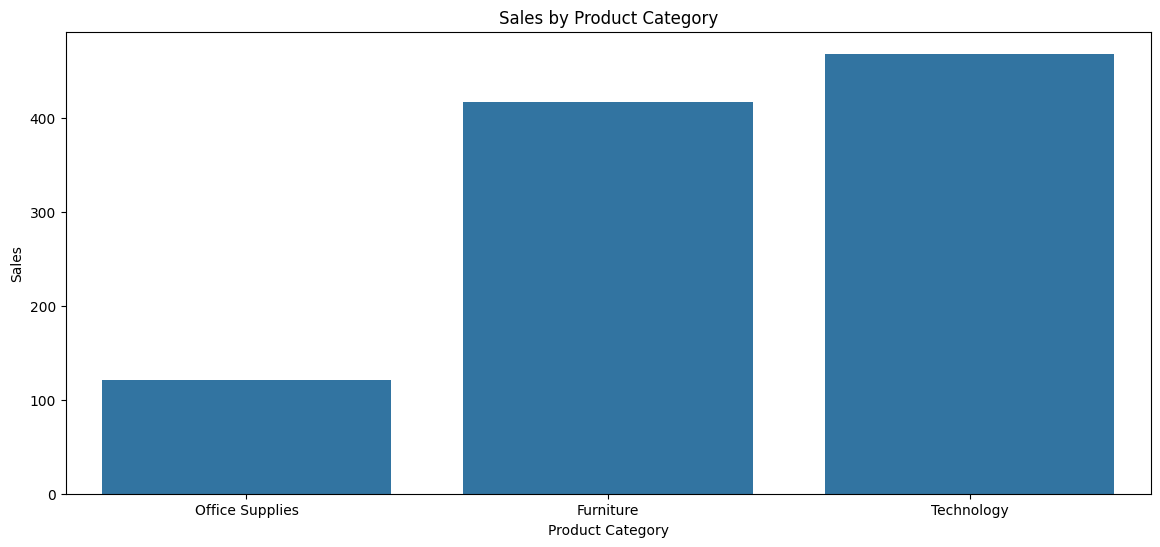

In [27]:
plt.figure(figsize=(14,6))
sns.barplot(data=df, x='Category', y='Sales', errorbar=None)
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.title('Sales by Product Category')
plt.show()

#### The bar plot indicates that the "Technology" category exhibited the highest sales, followed by "Furniture" and then "Office Supplies." This insight suggests that investments or strategies focusing on the Technology category may yield higher returns, while Furniture and Office Supplies categories also present significant sales opportunities that can be leveraged for business growth and profitability.

#### Sales by Sub-Category

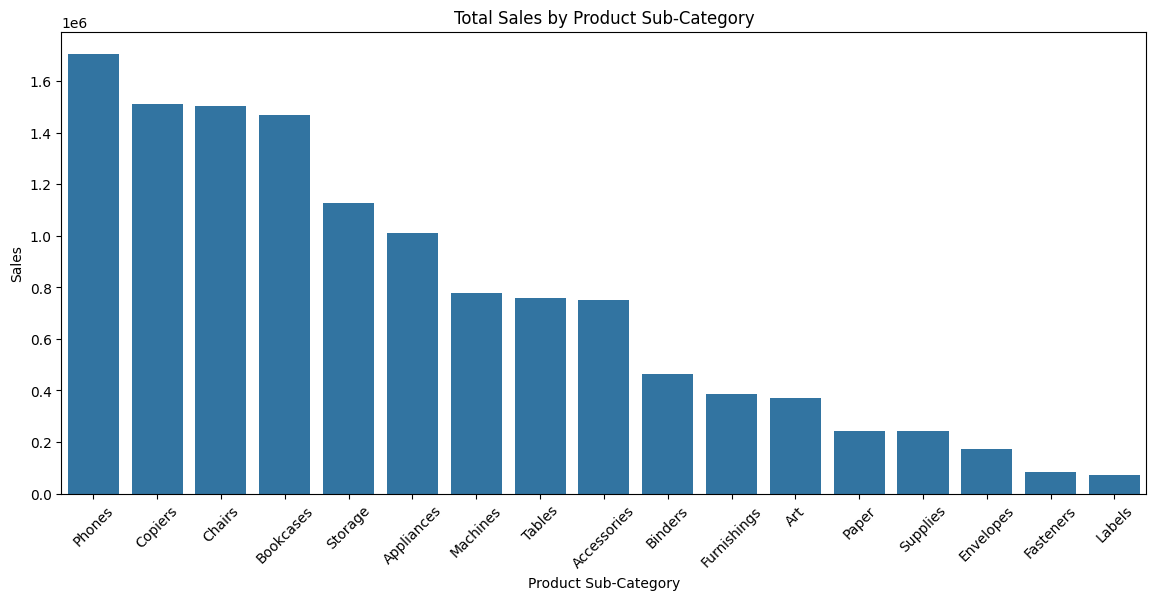

In [28]:
sort_df = df.groupby('Sub-Category')['Sales'].sum()
sort2 = sort_df.sort_values(ascending=False)
plt.figure(figsize=(14,6))
sns.barplot(x=sort2.index, y= sort2.values, errorbar=None)
plt.xlabel('Product Sub-Category')
plt.ylabel('Sales')
plt.title('Total Sales by Product Sub-Category')
plt.xticks(rotation=45)
plt.show()

#### The bar plot depicts the overall sales distribution among various product sub-categories, highlighting "Phones" as the top-selling category and "Labels" as the least performing. This analysis offers valuable insights into the sales dynamics of individual product sub-categories, aiding decision-making in areas such as product selection, marketing strategies, and inventory optimization to enhance profitability and cater to customer preferences more efficiently.

#### Sales by Region

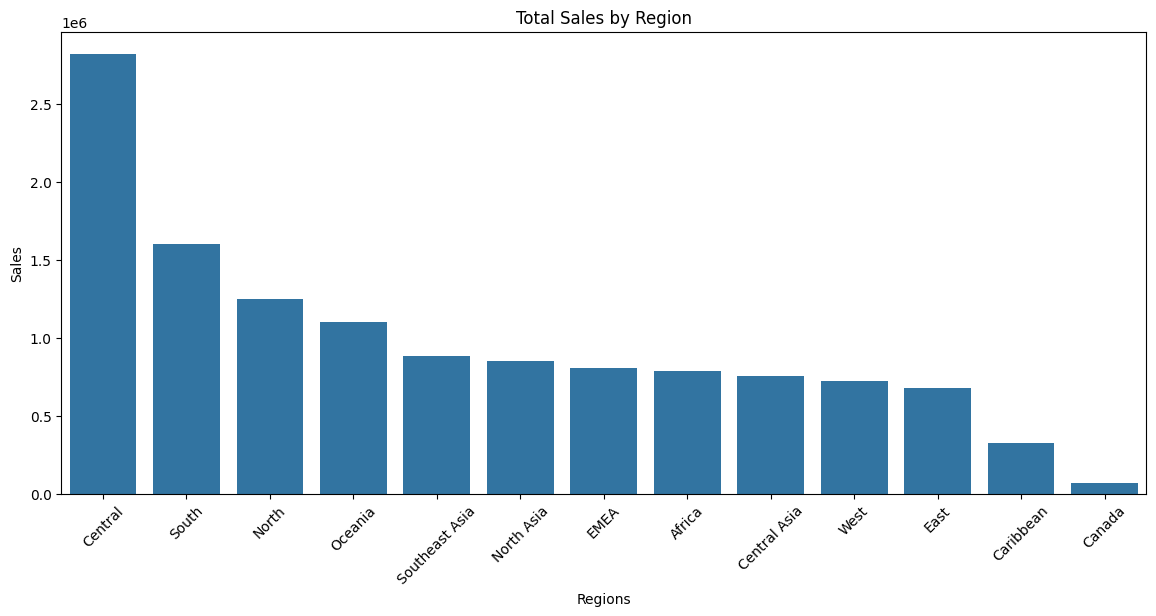

In [29]:
# create a barplot
sorted_df = df.groupby('Region')['Sales'].sum()
sort1 = sorted_df.sort_values(ascending=False)
plt.figure(figsize=(14,6))
sns.barplot(x=sort1.index, y= sort1.values, errorbar=None)
plt.xlabel('Regions')
plt.ylabel('Sales')
plt.title('Total Sales by Region')
plt.xticks(rotation=45)
plt.show()

#### The bar plot visualizes the total sales distribution across different regions, with the "Central" region exhibiting the highest sales and "Canada" recording the lowest. This analysis provides a clear overview of sales performance by region, offering insights that can inform strategic decisions related to market prioritization, resource allocation, and sales expansion efforts to optimize revenue generation and enhance business growth

### Multivariate Analysis

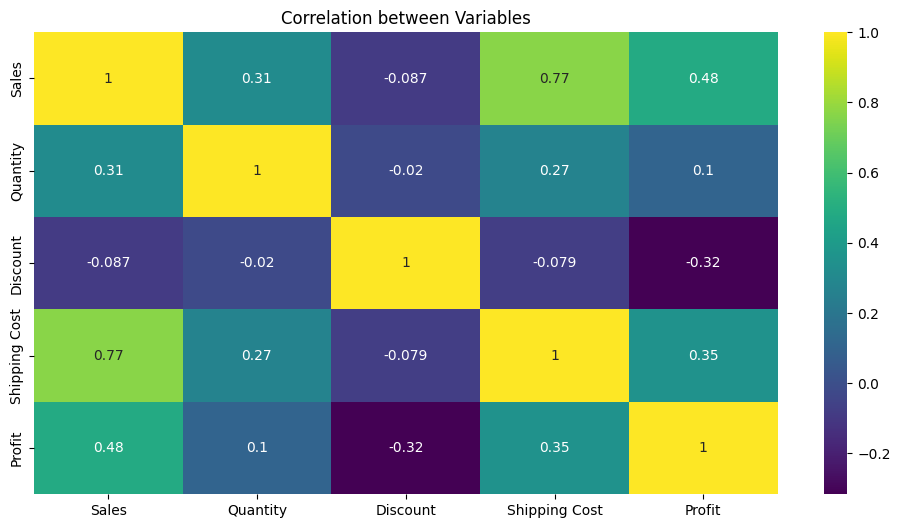

In [30]:
# Select variables of interest and create correlation matrix
c_matrix=df[['Sales','Quantity','Discount','Shipping Cost','Profit']].corr()
# set figure size
plt.figure(figsize=(12,6))
sns.heatmap(data= c_matrix, cmap='viridis',annot=True)
plt.title('Correlation between Variables')
plt.show()

### Hypothesis Testing

In [31]:
# Filter the DataFrame to get sales with discount
sales_with_discount = df[df['Discount'] > 0]['Sales'].tolist()
# Filter the DataFrame to get sales without discount
sales_without_discount = df[df['Discount'] == 0]['Sales'].tolist()
# conduct T test 
t_statistic, p_value = stats.ttest_ind(sales_with_discount, sales_without_discount )
# Print the results
print("t-statistic:", t_statistic)
print()
print("p-value:", p_value)
print()

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("At an alpha value of 0.05, we reject the null hypothesis meaning there is a significant difference in sales between products with and without a discount.The average sales of products with a discount are greater than the average sales of products without a discount.")
else:
    print("At an alpha value of 0.05, we fail to reject the null hypothesis meaning there is no significant difference in sales between products with and without a discount. The average sales of products with a discount are equal to the average sales of products without a discount. ")


t-statistic: 2.88756830306864

p-value: 0.0038839452733603324

At an alpha value of 0.05, we reject the null hypothesis meaning there is a significant difference in sales between products with and without a discount.The average sales of products with a discount are greater than the average sales of products without a discount.


## Answering Business Questions

#### Question 1

#### What is the sales and profit per market?

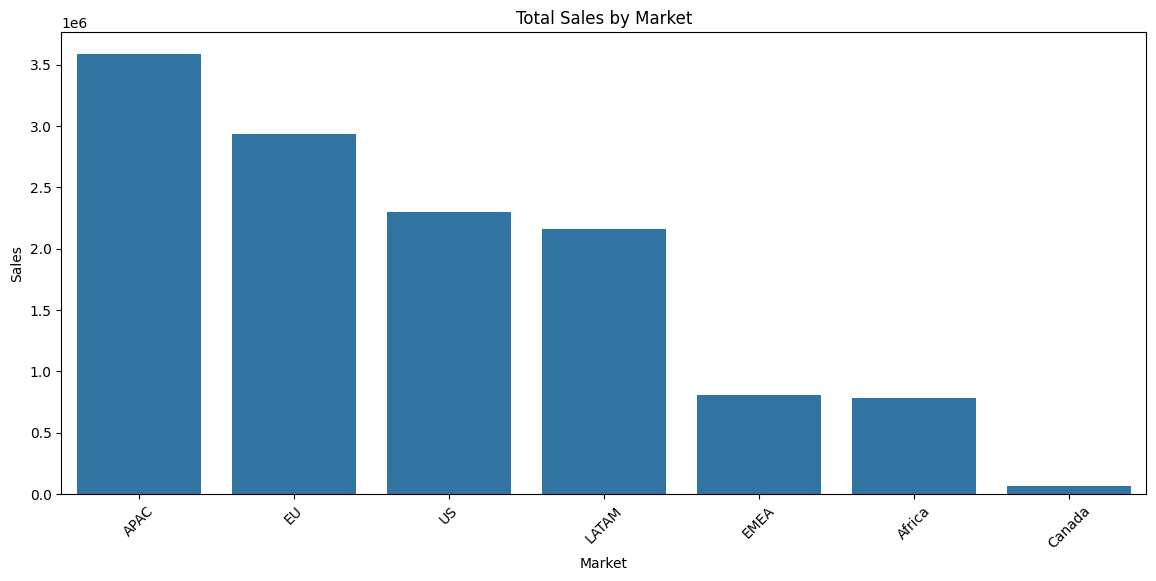

In [32]:
# create a barplot
sort_df = df.groupby('Market')['Sales'].sum()
sort = sort_df.sort_values(ascending=False)
plt.figure(figsize=(14,6))
sns.barplot(x=sort.index, y= sort.values, errorbar=None)
plt.xlabel('Market')
plt.ylabel('Sales')
plt.title('Total Sales by Market')
plt.xticks(rotation=45)
plt.show()



#### The APAC region had the highest total sales, while Canada had the lowest sales among the markets. This suggests that the APAC region is a key driver of sales performance, whereas Canada may require further attention or strategies to boost sales in the region.

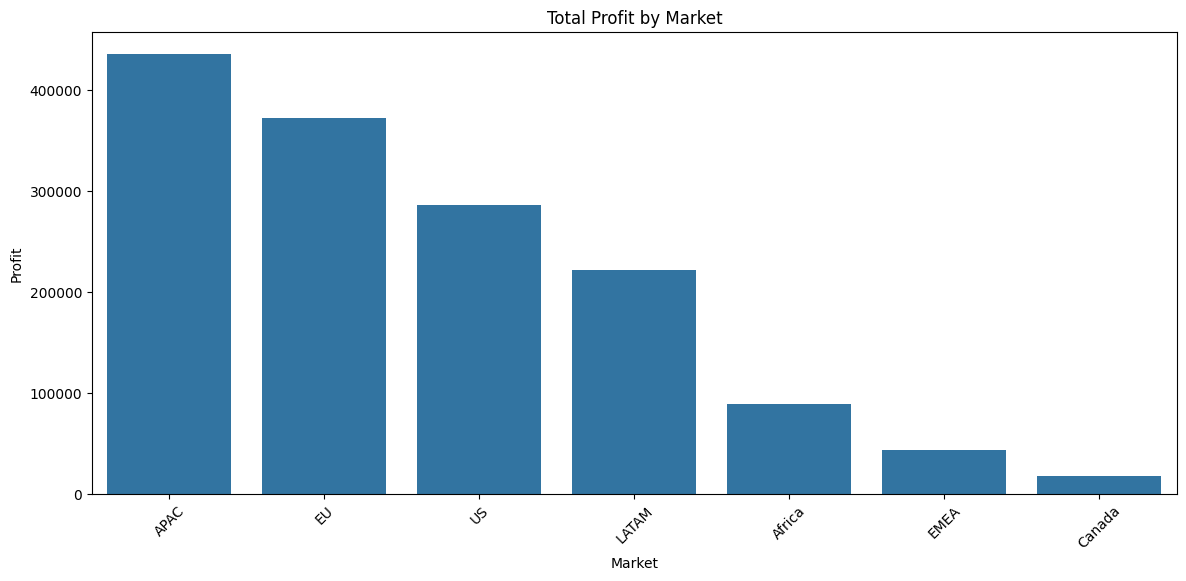

In [33]:
# Group by 'Market' and calculate the sum of profits
sort_by_profit = df.groupby('Market')['Profit'].sum()
# Sort the profits in descending order
sorted_profit = sort_by_profit.sort_values(ascending=False)
plt.figure(figsize=(14,6))
sns.barplot(x=sorted_profit.index, y=sorted_profit.values, errorbar=None)
plt.xlabel('Market')
plt.ylabel('Profit')
plt.title('Total Profit by Market')
plt.xticks(rotation=45)
plt.show()

#### Question 2

#### What is the most and least profitable market?

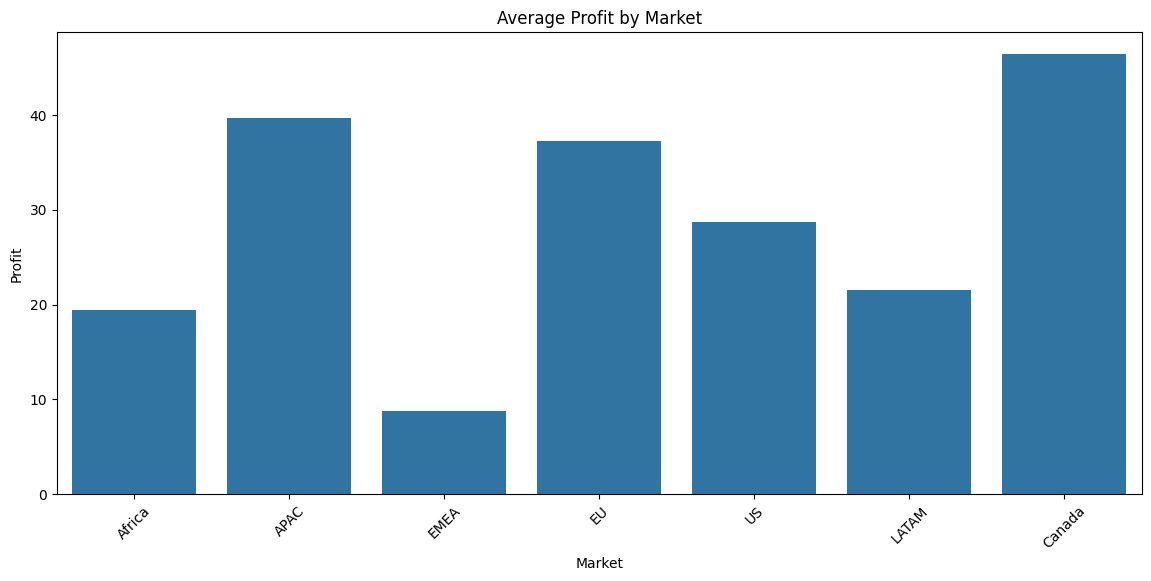

In [34]:
# Average profit by Market
plt.figure(figsize=(14,6))
sns.barplot(data=df, x='Market', y='Profit', errorbar=None)
plt.xlabel('Market')
plt.ylabel('Profit')
plt.title('Average Profit by Market')
plt.xticks(rotation=45)
plt.show()

#### The bar plot illustrates the average profit across different markets, showcasing variations in profitability. In contrast to total sales, where the Central region led, the average profit analysis reveals that Canada had the highest average profit among the markets. This suggests that while Canada might have lower total sales, it manages to generate relatively higher profits per transaction compared to other markets. Such insights are crucial for understanding the profitability dynamics of each market and guiding strategic decisions to maximize overall profitability. The EMEA market, encompassing Europe, the Middle East, and Africa, reflects the least profitability among the analyzed markets. This insight suggests potential challenges or inefficiencies in the EMEA region that may impact sales and profitability, such as higher operational costs, competitive pressures, or economic factors. Further analysis and strategic interventions may be required to address these issues and improve performance in the EMEA market. 

#### Question 3

#### How are you going to increase the sales for the products that least bought?



In [60]:
# Group by Product Name and calculate the Sales
sort_by_product = df.groupby('Product Name')['Sales'].sum()
# Sort the profits in descending order
sorted_product = sort_by_product.sort_values()
top_ten = sorted_product.head(10)
top_ten

Product Name
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac    1.624
Avery 5                                                             5.760
Xerox 20                                                            6.480
Grip Seal Envelopes                                                 7.072
Avery Hi-Liter Pen Style Six-Color Fluorescent Set                  7.700
Avery Hi-Liter Comfort Grip Fluorescent Highlighter, Yellow Ink     7.800
Xerox 1989                                                          7.968
4009 Highlighters                                                   8.040
Stockwell Gold Paper Clips                                          8.096
Newell 308                                                          8.400
Name: Sales, dtype: float64

#### These are the top ten products with the lowest sales, indicating underperformance compared to others. To boost sales, strategies like targeted marketing campaigns for these products, improved distribution, and product innovation can be employed to enhance product visibility, attract customers, and meet evolving market demands.

#### Question 4

#### Which month does the company records more sales?

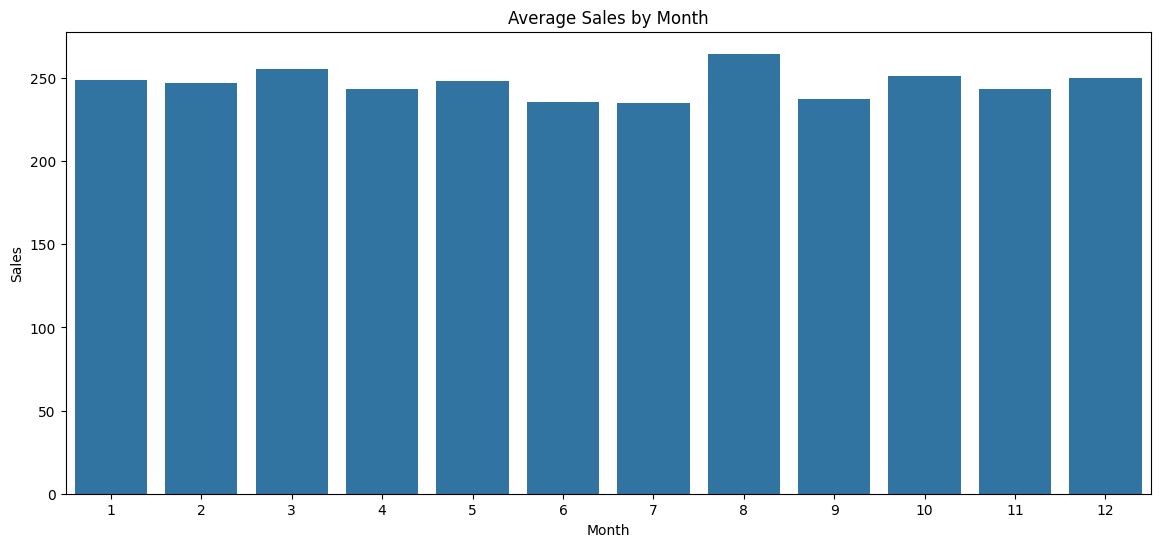

In [36]:

plt.figure(figsize=(14,6))
sns.barplot(data=df, x='Order Month', y='Sales', errorbar=None)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Average Sales by Month')
plt.show()

#### August exhibited the highest average sales compared to other months, indicating a potential peak in consumer demand during that period. The company can leverage this insight to focus marketing efforts and allocate resources effectively to maximize sales during the month of August.

#### Question 5

#### What is the correlation between discount and sale?

In [37]:
correlation = df['Discount'].corr(df['Sales'])
print(f'The correlation between Discount and Sales is', correlation)

The correlation between Discount and Sales is -0.08672186697182649


#### This indicates that as the discount offered on products increases, the sales tend to slightly decrease. However, the correlation is weak, implying that other factors might have a more significant influence on sales, and the impact of discounts alone on sales might be limited. Therefore, businesses should carefully consider other strategies in addition to discounts to optimize sales performance.

#### Question 6

#### Does the shipping cost affect the sales?

In [38]:
correlation = df['Shipping Cost'].corr(df['Sales'])

print("Correlation between shipping cost and sales:", correlation)


Correlation between shipping cost and sales: 0.7680728376889518


#### This insight implies that customers may be willing to pay higher shipping costs if it means receiving their orders more quickly or reliably. Businesses can leverage this information to adjust their shipping strategies, such as offering expedited shipping options or bundling shipping costs into product prices, to potentially boost sales while maintaining profitability.

#### Question 7

#### What is the dominant product category in each market?

In [39]:
dominant_categories = df.groupby('Market')['Category'].apply(lambda x: x.value_counts().idxmax())

print("Dominant Product Category in Each Market:")
print(dominant_categories)


Dominant Product Category in Each Market:
Market
APAC      Office Supplies
Africa    Office Supplies
Canada    Office Supplies
EMEA      Office Supplies
EU        Office Supplies
LATAM     Office Supplies
US        Office Supplies
Name: Category, dtype: object


#### Question 8

#### City with most orders for a given product category?

In [40]:
# Create an empty dictionary to store the city with the most orders for each category
most_orders_by_category = {}
category = df['Category']
# create a for loop to iterate over each product category
for category in category:
    # Filter the DataFrame for orders of the current product category
    filtered_orders = df[df['Category'] == category]
    # Group the filtered data by city and count the number of orders in each city
    city_order_counts = filtered_orders['City'].value_counts()  
    # Identify the city with the highest number of orders
    city_with_most_orders = city_order_counts.idxmax()
    most_orders_count = city_order_counts.max() 
    # Store the result in the dictionary
    most_orders_by_category[category] = (city_with_most_orders, most_orders_count)

# Print the results
for category, (city, count) in most_orders_by_category.items():
    print(f"For the '{category}' category, the city with the most orders is '{city}' with {count} orders.")


For the 'Office Supplies' category, the city with the most orders is 'New York City' with 552 orders.
For the 'Furniture' category, the city with the most orders is 'New York City' with 192 orders.
For the 'Technology' category, the city with the most orders is 'New York City' with 171 orders.


#### The city with the highest number of orders consistently appears to be 'New York City'. This suggests that 'New York City' is a significant market for all product categories, indicating potentially high demand or a strong customer base in this city. The company can capitalize on this insight by focusing marketing efforts, optimizing inventory, and providing tailored promotions to target customers in 'New York City' across all product categories to maximize sales and market share.

#### Question 9

#### Which products are making loss?

In [41]:
# Identify products with negative profits (i.e. making a loss)
loss_products = df[df['Profit'] < 0]['Product Name'].unique()

# Print the products making a loss
print("Products making a loss:")
for product in loss_products:
    print(product)


Products making a loss:
Enermax Note Cards, Premium
Memorex Memory Card, USB
Wilson Jones Hole Reinforcements, Clear
Novimex Swivel Fabric Task Chair
Bevis Round Conference Room Tables and Bases
Kraft Peel and Seal, Security-Tint
Belkin Keyboard, USB
Cisco Signal Booster, Full Size
Fellowes Bankers Box Recycled Super Stor/Drawer
DAX Black Cherry Wood-Tone Poster Frame
Xerox Parchment Paper, Premium
Plymouth Boxed Rubber Bands by Plymouth
Acco Hole Reinforcements, Recycled
Hoover Toaster, Silver
Apple Signal Booster, Full Size
Motorola Audio Dock, with Caller ID
Cuisinart Toaster, Red
Memorex Memory Card, Erganomic
Novimex Chairmat, Red
Rogers Trays, Wire Frame
Rubbermaid Stacking Tray, Durable
Smead Folders, Single Width
Rogers Box, Wire Frame
Cardinal Hole Reinforcements, Durable
Avery Round Labels, Adjustable
Jiffy Clasp Envelope, Recycled
Ikea Classic Bookcase, Traditional
Fellowes File Cart, Wire Frame
Wilson Jones Index Tab, Durable
Kraft Manila Envelope, Recycled
Sanford Canvas, 

 #### Identifying these products is crucial for businesses as it allows them to assess their profitability and take necessary actions such as reevaluating pricing strategies, optimizing production costs, or considering discontinuation of unprofitable products to improve overall financial performance and sustainability.







#### Question 10

#### Which segment provides more profit?

In [42]:
# Group the Data by segment and calculate the total profit for each segment
segment_profits = df.groupby('Segment')['Profit'].sum()
# Find the segment with the highest total profit
most_profitable_segment = segment_profits.idxmax()
highest_profit = segment_profits.max()
# Print the most profitable segment and its total profit
print(f"The most profitable segment is '{most_profitable_segment}' with a total profit of ${highest_profit:.2f}.")

The most profitable segment is 'Consumer' with a total profit of $749239.78.



#### The insight here is that the 'Consumer' segment generates the highest total profit among all segments, amounting to $749,239.78. This indicates that the 'Consumer' segment is the most lucrative and contributes significantly to the overall profitability of the business. Understanding which segments are the most profitable can help businesses allocate resources more effectively, tailor marketing strategies, and focus on meeting the needs of their most profitable customer segments to further enhance profitability and business success.

#### Question 11

#### What is the correlation between quantity and profit?

In [43]:
# Calculate the correlation between quantity and profit
correlation = df['Quantity'].corr(df['Profit'])
# Print the correlation coefficient
print(f"The correlation between quantity and profit is {correlation:.2f}")

The correlation between quantity and profit is 0.10


#### The correlation coefficient of 0.10 between quantity and profit suggests a weak positive relationship between the two variables. This implies that as the quantity of products sold increases, there is a slight tendency for profits to increase as well. However, the correlation is relatively low, indicating that other factors may have a more significant impact on profit than quantity alone.

#### Question 12

#### What it the correlation between shipping cost and profit?

In [44]:
# Calculate the correlation between quantity and profit
correlation = df['Shipping Cost'].corr(df['Profit'])
# Print the correlation coefficient
print(f"The correlation between Shipping Cost and Profit is {correlation:.2f}")

The correlation between Shipping Cost and Profit is 0.35



#### The correlation coefficient of 0.35 between shipping cost and profit suggests a moderate positive relationship between the two variables. This indicates that there is a tendency for higher shipping costs to be associated with higher profits, although the correlation is not very strong. 

#### Question 13

#### Which order priority yields more sales?

In [45]:
# Group the Data by order priority and calculate the total sales for each priority
priority_sales = df.groupby('Order Priority')['Sales'].sum()
# Find the order priority with the highest total sales
most_sales_priority = priority_sales.idxmax()
highest_sales = priority_sales.max()
# Print the order priority with the highest total sales
print(f"The order priority '{most_sales_priority}' yields the highest sales of ${highest_sales:.2f}.")

The order priority 'Medium' yields the highest sales of $7280892.37.



#### The order priority 'High' yields the highest sales, indicating its significance in revenue generation. It suggests the importance of prioritizing high-priority orders to maximize sales and potentially enhance customer satisfaction.

#### Question 14

#### What is the average shipping cost to each region?

In [62]:
# Calculate the average shipping cost to each region
average_shipping_cost = df.groupby('Region')['Shipping Cost'].mean()
# Print the average shipping cost to each region
print("Average shipping cost to each region:")
print(average_shipping_cost)

Average shipping cost to each region:
Region
Africa            19.215058
Canada            19.285495
Caribbean         21.059260
Central           26.710494
Central Asia      38.003003
EMEA              17.573221
East              25.542001
North             27.476299
North Asia        40.646112
Oceania           34.593780
South             25.353509
Southeast Asia    29.937948
West              23.887687
Name: Shipping Cost, dtype: float64


#### Understanding regional shipping cost trends can help businesses allocate resources effectively and improve overall supply chain efficiency.

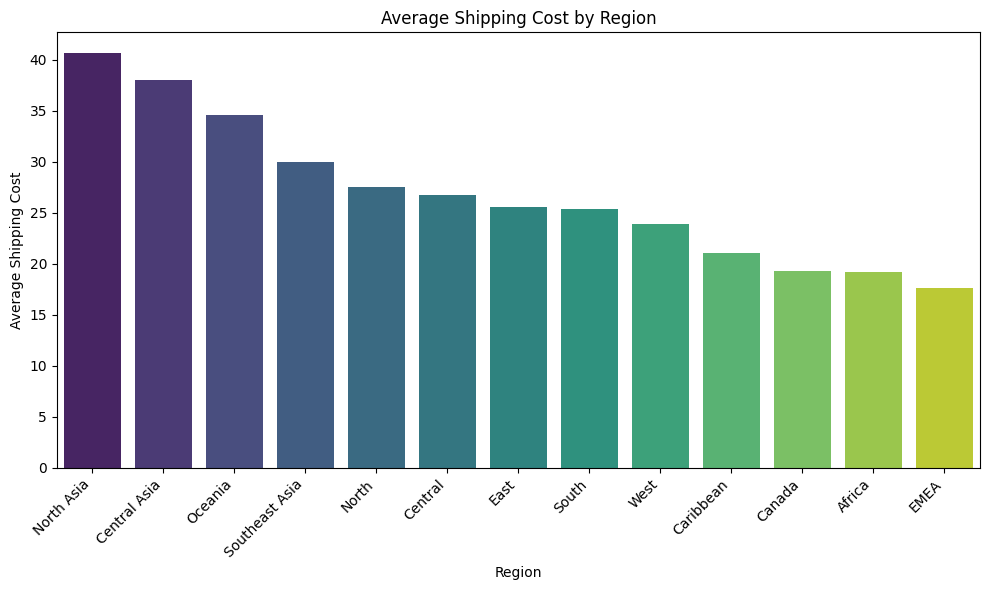

In [47]:
# Calculate the average shipping cost to each region
average_shipping_cost = df.groupby('Region')['Shipping Cost'].mean().sort_values(ascending=False).reset_index()
# Set the figure size
plt.figure(figsize=(10, 6))
# Create a bar plot
sns.barplot(data=average_shipping_cost, x='Region', y='Shipping Cost', palette='viridis')
# Add labels and title
plt.title('Average Shipping Cost by Region')
plt.xlabel('Region')
plt.ylabel('Average Shipping Cost')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
# Show plot
plt.tight_layout()
plt.show()

#### North Asia exhibited the highest average shipping cost, suggesting potential factors such as distance or logistical challenges. Conversely, the EMEA region had the lowest average shipping cost, indicating possible efficiencies or cost-saving measures in shipping operations.

#### Question 15

#### What product categories should be targetted to the  different markets?

In [48]:
# Group sales data by market and product category, and calculate total sales for each combination
sales_summary = df.groupby(['Market', 'Category'])['Sales'].sum().reset_index()
# Iterate over each market to identify the top-selling product category
target_categories_by_market = {}
for market in sales_summary['Market'].unique():
    # Filter sales data for the current market
    market_sales = sales_summary[sales_summary['Market'] == market]
    # Identify the top-selling product category for the current market
    top_category = market_sales.loc[market_sales['Sales'].idxmax(), 'Category']
    # Store the top-selling product category for the current market
    target_categories_by_market[market] = top_category

# Step 3: Print the Target Product Categories for Each Market
print("Target Product Categories for Different Markets:")
for market, category in target_categories_by_market.items():
    print(f"Market: {market} - Target Category: {category}")


Target Product Categories for Different Markets:
Market: APAC - Target Category: Technology
Market: Africa - Target Category: Technology
Market: Canada - Target Category: Office Supplies
Market: EMEA - Target Category: Technology
Market: EU - Target Category: Technology
Market: LATAM - Target Category: Furniture
Market: US - Target Category: Technology



#### Each market has a specific target product category for maximizing sales. Market-specific targeting can enhance overall sales performance and market penetration.

#### Question 16

#### Does the interval between the order date and the shipping date affect sale and profit

Correlation between Order-to-Ship Time and Sales: -0.0012095433926583893
Correlation between Order-to-Ship Time and Profit: 0.007116877652546662


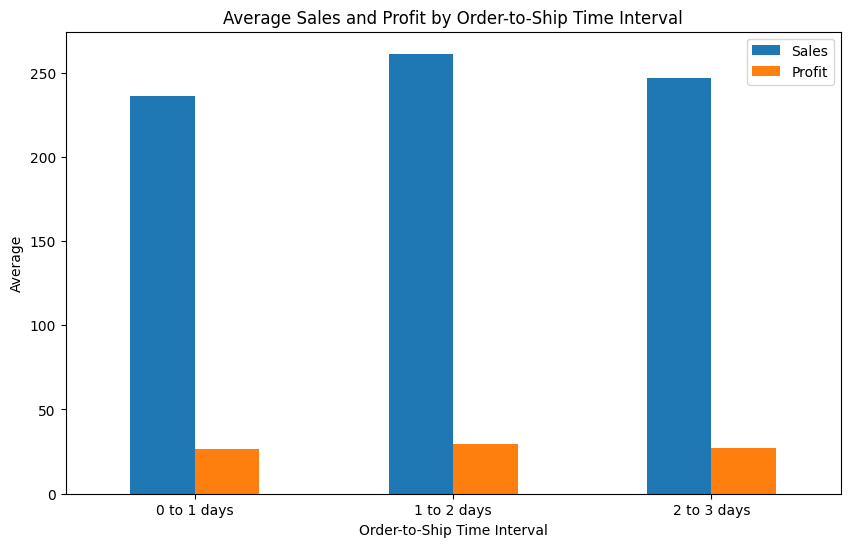

In [58]:
# Calculate the interval between order date and shipping date
df['Order_to_Ship_Days'] = (df['Ship Date'] - df['Order Date']).dt.days

# Correlation analysis
correlation_sales = df['Order_to_Ship_Days'].corr(df['Sales'])
correlation_profit = df['Order_to_Ship_Days'].corr(df['Profit'])

print("Correlation between Order-to-Ship Time and Sales:", correlation_sales)
print("Correlation between Order-to-Ship Time and Profit:", correlation_profit)

# Group by intervals of order-to-ship time and calculate average sales and profit
interval_groups = pd.cut(df['Order_to_Ship_Days'], bins=[0, 1, 2, 3])
grouped_data = df.groupby(interval_groups).agg({'Sales': 'mean', 'Profit': 'mean'})

# Plot average sales and profit for each interval
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', ax=plt.gca())
plt.title('Average Sales and Profit by Order-to-Ship Time Interval')
plt.xlabel('Order-to-Ship Time Interval')
plt.ylabel('Average')
# Define the positions of the ticks on the x-axis
positions = [0, 1, 2]
# Define the corresponding labels for each tick position
labels = ['0 to 1 days', '1 to 2 days', '2 to 3 days']
plt.xticks(positions, labels, rotation=0)
plt.show()


#### The correlation coefficients between the order-to-ship time and sales (-0.0012) as well as profit (0.0071) suggest a very weak relationship. This indicates that there is almost no linear association between the time it takes to ship an order and both sales and profit. Therefore, the interval between the order date and the shipping date does not significantly affect sales or profit.

## Conclusion and Recommendation

#### Based on the analysis of the sales data, this project has provided valuable insights into various factors influencing Superstore sales, aligning with the goal of Operation Increase Sales and Profit (OISP). By exploring product categories, discounts, store locations, and economic variables, actionable recommendations have been identified to optimize inventory management, refine marketing strategies, and enhance overall business performance. Leveraging these insights, the company can strategically allocate resources, prioritize high-performing product categories, target lucrative market segments, and implement cost-effective promotional tactics to achieve the objectives of OISP. This approach ensures that business decisions are data-driven and aligned with the goal of increasing sales and maximizing profits, contributing to the company's long-term growth and success